# Урок 3. Деревья решений.

В уроках мы разбирали на небольшом наборе данных деревья решений без настройки гиперпараметров. Здесь предлагаем вам рассмотреть работу классификатора на более сложном датасете, применив настройку гиперпараметров.

### 1.
На датасете из предыдущего урока - load_wine() - обучите дерево решений (DecisionTreeClassifier).

*Примечание: при установке гиперпараметров модели и разбиении на тренировочный и тестовый датасеты используйте random_state=17 для воспроизводимости результатов.*

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(wine['data'], wine['target'], random_state=17)

dtc = DecisionTreeClassifier()

model = dtc.fit(x_train, y_train)

### 2.
Отобразите дерево с помощью библиотеки graphviz.

*Примечание: если, изучая урок, вы не установили библиотеку graphviz, то необходимо сделать это сейчас.*

In [8]:
from sklearn import tree
import graphviz

In [11]:
def print_tree(data):
    dot_data = tree.export_graphviz(data, out_file=None, 
                                   feature_names=wine.feature_names, 
                                   class_names=wine.target_names,
                                   filled=True)
    return graphviz.Source(dot_data)

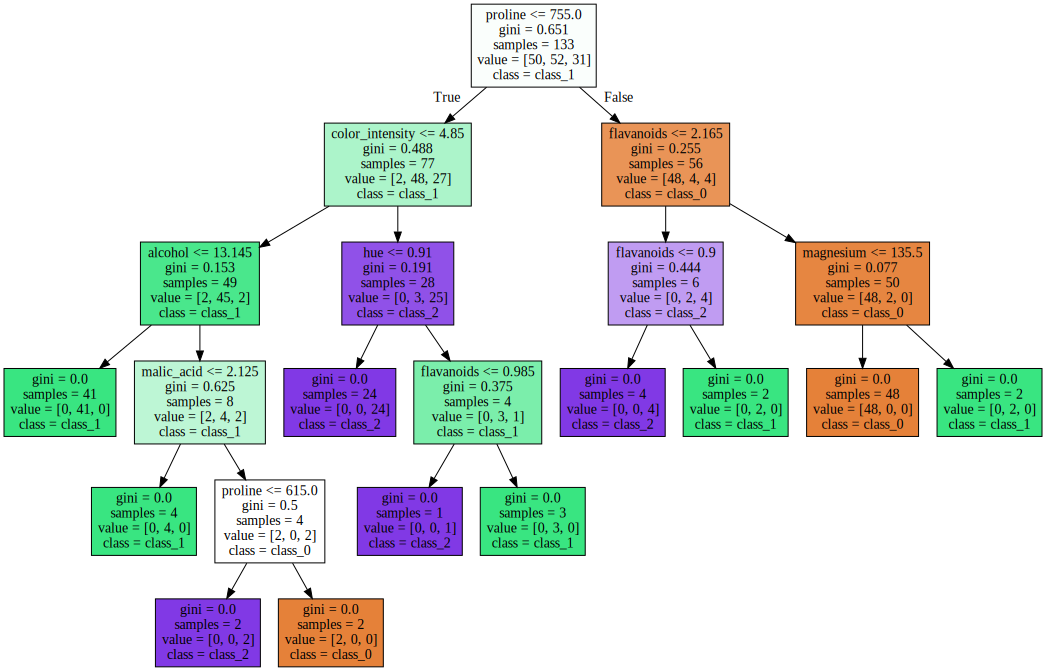

In [12]:
print_tree(model)

### 3.
Используя полученную модель, сделайте прогноз для тестовой выборки данных и, пользуясь встроенной функцией score(), определите точность модели.

In [14]:
prediction = model.predict(x_test)
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


Теперь попробуем сделать начальную настройку гиперпараметров и посмотреть, что из этого выйдет. 

### 4.

Постройте модель, указав гиперпараметр max_features равным 2 (так же указав random_state=17) и, сделав прогноз на тестовых данных, определите, стала ли модель работать точнее.

*Примечание: гиперпараметр max_features показывает модели, сколько различных признаков необходимо использовать каждый раз при принятии решения о разделении. То есть если, допустим, у вас имеются 50 признаков, а max_features=10, то в каждом узле случайным образом выбираются 10 признаков, которые будут использоваться для поиска лучшего разделения.*

In [15]:
x_train, x_test, y_train, y_test = train_test_split(wine['data'], wine['target'], random_state=17)

dtc = DecisionTreeClassifier(max_features=2, random_state=17)

model = dtc.fit(x_train, y_train)

prediction = model.predict(x_test)
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


Точность увеличилась

### 5.
Теперь постройте граф дерева решений, используя graphviz.

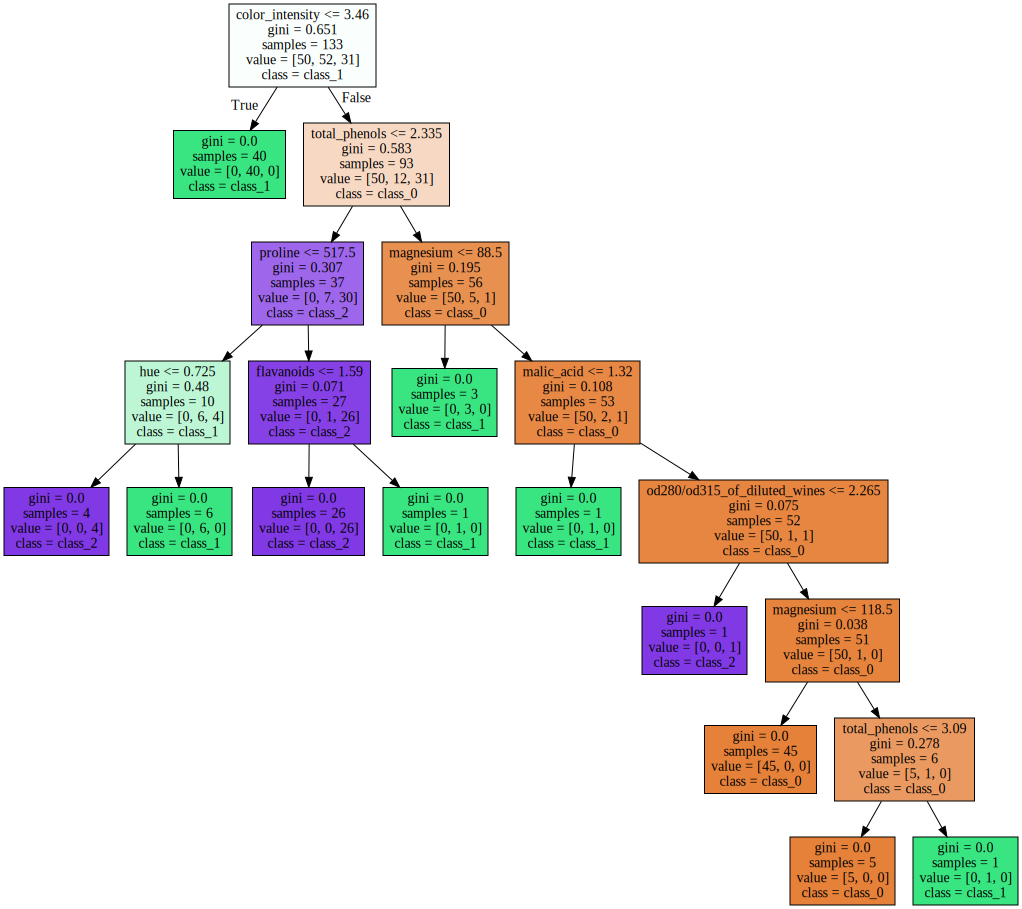

In [16]:
print_tree(model)

Модель работает точнее, чем без настройки гиперпараметров, но по графу можно увидеть, что глубина дерева увеличилась, при этом в нескольких листах присутствует только по одному объекту, из-за чего на тестовом наборе данных дерево могло несколько потерять обобщающую способность.

Так как главная задача модели - способность обобщаться на новые данные, то для подбора оптимальных гиперпараметров надо пожертвовать небольшой порцией данных, чтобы на ней во время обучения проверять качество модели.

Часто для этого используют кросс-валидацию: модель обучается K раз на (K-1) подвыборках исходной выборки, а на одной подвыборке проверяется (каждый раз на разной). Получаются K оценок качества модели, которые обычно усредняются, давая среднюю оценку.

Кросс-валидация применяется для подбора гиперпараметров модели в методе GridSearchCV(): для каждой уникальной совокупности значений параметров проводится кросс-валидация и выбирается лучшее сочетание параметров.

### 6.
Используя обученное в предыдущем задании дерево решений, настройте параметры max_depth и max_features на 5-кратной валидации с помощью GridSearchCV. Для этого в функцию GridSearchCV передайте параметры (tree, tree_params, cv=5).

*Примечание: tree здесь - не обученная модель, а объект, который инкапсулирует алгоритм. Например, в уроке мы его обозначали как dtc.*

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [19]:
tree_params = {'max_depth': range(1, 6), 
               'max_features': range(1, 10)}

tree_grid = GridSearchCV(dtc, tree_params, cv=5)

### 7.
С помощью метода tree_grid.fit() постройте модель на тренировочных данных и выведите лучшее сочетание параметров с помощью метода tree_grid.best_params_.

In [40]:
model = tree_grid.fit(x_train,y_train)

C:\Users\FilippKashket\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
model.best_params_

{'max_depth': 5, 'max_features': 1}

### 8.
С помощью полученной модели сделайте прогноз - predict - для тестовой выборки и выведите долю верных ответов, проверив точность модели, используя функцию accuracy_score.

In [42]:
from sklearn.metrics import accuracy_score

In [45]:
predicted = model.predict(x_test)
accuracy = accuracy_score(predicted,y_test)
accuracy

0.9111111111111111